In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import json
import os
from os.path import dirname, join
from pdb import set_trace

import jupytools
import jupytools.syspath
import numpy as np
import pandas as pd

jupytools.syspath.add(join(dirname(os.getcwd()), 'protein_project'))
jupytools.syspath.add('rxrx1-utils')
if jupytools.is_notebook():
    from tqdm import tqdm_notebook as tqdm
else:
    from tqdm import tqdm as tdqm
    
import contextlib, io
with contextlib.redirect_stderr(io.StringIO()):
    from augmentation import Augmented, multichannel_norm
    from basedir import ROOT, NUM_CLASSES
    from dataset import load_data, RxRxDataset
    from visual import rgb, six, show_1, show

In [3]:
data_dict = load_data()

In [4]:
train_data, test_data = data_dict['data']

In [5]:
train_exp = np.unique([r['experiment'] for r in train_data])
test_exp = np.unique([r['experiment'] for r in test_data])

In [6]:
train_exp, test_exp

(array(['HEPG2-01', 'HEPG2-02', 'HEPG2-03', 'HEPG2-04', 'HEPG2-05',
        'HEPG2-06', 'HEPG2-07', 'HUVEC-01', 'HUVEC-02', 'HUVEC-03',
        'HUVEC-04', 'HUVEC-05', 'HUVEC-06', 'HUVEC-07', 'HUVEC-08',
        'HUVEC-09', 'HUVEC-10', 'HUVEC-11', 'HUVEC-12', 'HUVEC-13',
        'HUVEC-14', 'HUVEC-15', 'HUVEC-16', 'RPE-01', 'RPE-02', 'RPE-03',
        'RPE-04', 'RPE-05', 'RPE-06', 'RPE-07', 'U2OS-01', 'U2OS-02',
        'U2OS-03'], dtype='<U8'),
 array(['HEPG2-08', 'HEPG2-09', 'HEPG2-10', 'HEPG2-11', 'HUVEC-17',
        'HUVEC-18', 'HUVEC-19', 'HUVEC-20', 'HUVEC-21', 'HUVEC-22',
        'HUVEC-23', 'HUVEC-24', 'RPE-08', 'RPE-09', 'RPE-10', 'RPE-11',
        'U2OS-04', 'U2OS-05'], dtype='<U8'))

In [7]:
set(train_exp).symmetric_difference(set(test_exp)) == (set(train_exp).union(test_exp))

True

In [24]:
trn_df = pd.DataFrame(train_data)

In [54]:
exp_stats = {}
for exp, df in tqdm(trn_df.groupby('experiment')):
    images = df.apply(six, axis=1).tolist()
    block = np.stack(images).transpose(1, 0, 2, 3)
    channelwise_mean = np.mean(block, axis=(1, 2, 3))
    channelwise_std = np.std(block, axis=(1, 2, 3))
    exp_stats[exp] = {'mean': channelwise_mean, 'std': channelwise_std}

In [56]:
tst_df = pd.DataFrame(test_data)

In [57]:
for exp, df in tqdm(tst_df.groupby('experiment')):
    images = df.apply(six, axis=1).tolist()
    block = np.stack(images).transpose(1, 0, 2, 3)
    channelwise_mean = np.mean(block, axis=(1, 2, 3))
    channelwise_std = np.std(block, axis=(1, 2, 3))
    exp_stats[exp] = {'mean': channelwise_mean, 'std': channelwise_std}

In [59]:
exp_stats_py = {
    k: {name: stats.tolist() for name, stats in v.items()} 
    for k, v in exp_stats.items()}

In [65]:
assert sorted(exp_stats_py.keys()) == sorted(set(train_exp).union(set(test_exp)))

In [67]:
with open('exp_channelwise_stats.json', 'w') as f:
    json.dump(exp_stats_py, f)

In [8]:
with open('exp_channelwise_stats.json') as f:
    exp_stats_py = json.load(f)

In [ ]:
f, axes = plt.subplots()

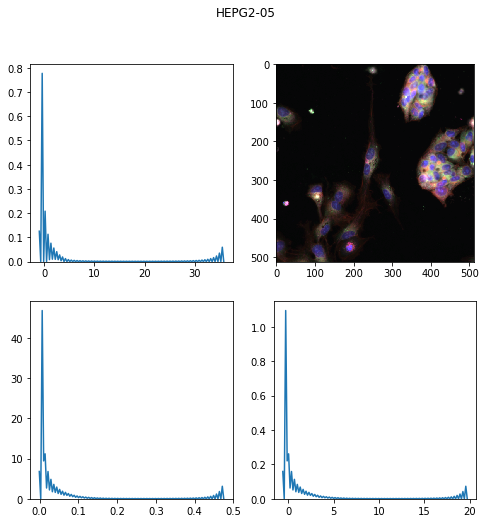

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
index = 9090
img = six(train_data[index])
img_norm = multichannel_norm(img.astype(float), exp_stats_py[train_data[index]['experiment']])
pixel_values = img_norm.ravel()
f, axes = plt.subplots(2, 2, figsize=(8, 8))
sns.kdeplot(list(pixel_values), ax=axes[0][0])
show_1(img, ax=axes[0][1])
sns.kdeplot(list(img.ravel()/255), ax=axes[1][0])
img_01 = (img - img.mean())/(img.std() + 1e-8)
sns.kdeplot(list(img_01.ravel()), ax=axes[1][1])
title = f"{train_data[index]['experiment']}"
f.suptitle(title);

In [44]:
show(*df[:3].apply(six, axis=1).tolist());

NameError: name 'df' is not defined